# 1. KNN k-nearest neighbor
# language : Python
https://www.youtube.com/watch?v=ngLyX54e1LU&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=1
 

- ## 모델 구성

In [15]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))


class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get k nearest samples, labels
        k_indices =  np.argsort(distances[:self.k])
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]



## test set 만들기

(120, 4)
[5.1 2.5 3.  1.1]
(120,)
[1 2 0 2 1 0 0 0 0 1 0 1 0 2 2 0 2 2 2 2 0 2 2 1 1 1 1 1 1 0 0 2 2 2 0 0 0
 2 1 2 2 1 0 2 0 2 0 1 1 0 1 0 2 2 2 1 0 0 2 1 1 0 1 2 1 1 1 0 0 0 1 1 0 2
 1 2 2 1 0 1 2 0 0 2 2 1 1 2 0 1 2 2 2 1 0 0 0 0 2 1 2 0 0 1 1 2 1 1 2 2 2
 0 2 0 0 2 2 1 0 0]


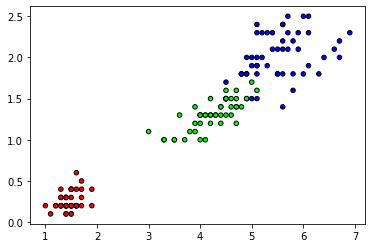

In [16]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_train[0])

print(y_train.shape)
print(y_train)

plt.figure()
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

## 함수 적용해보기

In [17]:
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc = np.sum(predictions==y_test)/len(y_test)
print(acc)

0.6333333333333333


In [18]:
## Counter 함수 알아보기
from collections import Counter

a = [1,1,1,2,2,3,4,5,6]
most_common = Counter(a).most_common(1)
print(most_common)
print(most_common[0])
print(most_common[0][0])

[(1, 3)]
(1, 3)
1
